In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_csv('data/fatal-police-shootings-data.csv', parse_dates=['date'])
df.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,longitude,latitude,is_geocoding_exact
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,-123.122,47.247,True
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,-122.892,45.487,True
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,-97.281,37.695,True
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,-122.422,37.763,True
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,-104.692,40.384,True


In [4]:
df.shape

(5764, 17)

### Hypothesis

- News reporting: there are more police shootings than reported on news outlets and received wide public attention. (what type of police shooting does news outlets tend to report? need victim names that received public attention)
- Fatal shots typically happen in situations when threat level was attack.
- Mental illness:
- Does fleeing predict lower level of threat for police officers?
- Body camera: does wearing a body camera lead to more prudent use of force? (fatal shots happen at a higher threat level compared to no body camera?)
- Location: what type of locations does fatal shooting tend to occur? (city, surburban, residential, downtown, etc, probably need to match some map data)


### Challenges
- The data only captures cases of fatal shooting. To draw conclusions, some questions require data on all cases, which will be too large.

In [68]:
for col in df.columns:
    print(col, str(round(100*df[col].isnull().sum()/len(df), 2)) + '%')

id 0.0%
name 3.85%
date 0.0%
manner_of_death 0.0%
armed 3.7%
age 4.61%
gender 0.03%
race 11.05%
city 0.0%
state 0.0%
signs_of_mental_illness 0.0%
threat_level 0.0%
flee 5.22%
body_camera 0.0%
longitude 4.89%
latitude 4.89%
is_geocoding_exact 0.0%


In [93]:
df["weekday"] = df["date"].dt.weekday
df['month'] = df['date'].dt.month
df['month_day'] = df['date'].dt.day
df['year'] = df['date'].dt.year
df['month_year'] = df['date'].dt.to_period('M')
df['dayofyear'] = df['date'].dt.dayofyear
df.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,...,body_camera,longitude,latitude,is_geocoding_exact,weekday,month,month_day,year,month_year,dayofyear
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,...,False,-123.122,47.247,True,4,1,2,2015,2015-01,2
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,...,False,-122.892,45.487,True,4,1,2,2015,2015-01,2
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,...,False,-97.281,37.695,True,5,1,3,2015,2015-01,3
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,...,False,-122.422,37.763,True,6,1,4,2015,2015-01,4
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,...,False,-104.692,40.384,True,6,1,4,2015,2015-01,4


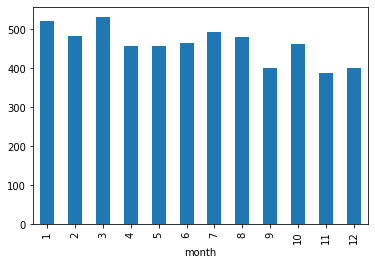

In [182]:
data = df.groupby('month')['name'].count()
data.plot(kind='bar')

In [181]:
print('Nulls')
print(df.race.isnull().groupby([df.year]).sum().reset_index())
print('Total Number')
print(df.groupby('year')['name'].count().reset_index())

Nulls
   year   race
0  2015   29.0
1  2016   56.0
2  2017   77.0
3  2018  101.0
4  2019  141.0
5  2020  233.0
Total Number
   year  name
0  2015   993
1  2016   951
2  2017   953
3  2018   932
4  2019   946
5  2020   767


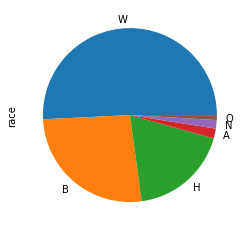

In [8]:
df.race.value_counts().plot.pie(y='race')


W    2603
B    1353
H     949
A      94
N      81
O      47
Name: race, dtype: int64


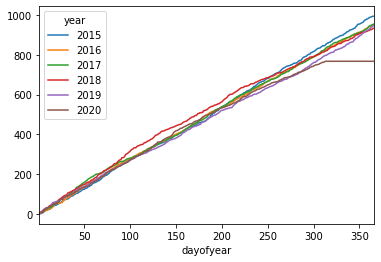

In [152]:
print(df.race.value_counts())
data = df.groupby(['year', 'dayofyear'])['name'].count() \
         .groupby(level=0).cumsum().reset_index()
data.columns = ['year', 'dayofyear', 'count']
data = data.pivot(index='dayofyear', columns='year', values='count').ffill()
data.plot()

In [129]:
data

,year,dayofyear,count
0,2015,6,1
1,2015,7,4
2,2015,8,5
3,2015,14,7
4,2015,15,9
...,...,...,...
990,2020,296,153
991,2020,298,154
992,2020,300,155
993,2020,301,156


In [109]:
data = df.groupby('date')['name'].count().reset_index()
data.columns = ['date', 'count']
data['dayofyear'] = data.date.dt.dayofyear
data['year'] = data.date.dt.year
data.groupby('year')['count'].cumsum()

0         2
1         3
2         6
3         7
4        11
       ... 
1977    760
1978    762
1979    765
1980    767
1981    767
Name: count, Length: 1982, dtype: int64

In [89]:
?pd.DataFrame.plot

### Plots
1. body camera vs threat_level / armed
2. cumulative cases by year (all, & black)
3. data map by year
4. data map zooming into specific cities
5. fatal force vs. crime rate

### Findings
1. little reduction over the years
2. white is highest by count. when divided by total population, black is higher.

### Supplemental data
1. US overall crime statistics by race
2. type of address (urban, rural, surburban)
3. police data


Does wearing a body camera lead to more prudent use of force? (fatal shots happen at a higher threat level compared to no body camera?)

In [10]:
print(df.armed.value_counts())
print(df.threat_level.value_counts())
print(df.body_camera.value_counts())

gun             3288
knife            852
unarmed          366
toy weapon       194
undetermined     169
                ... 
nail gun           1
flagpole           1
fireworks          1
stapler            1
wrench             1
Name: armed, Length: 95, dtype: int64
attack          3733
other           1781
undetermined     250
Name: threat_level, dtype: int64
False    5069
True      695
Name: body_camera, dtype: int64


In [27]:
df[['body_camera', 'threat_level', 'name']].groupby(['body_camera', 'threat_level']).count()

name
body_camera threat_level      
False       attack        3188
            other         1470
            undetermined   204
True        attack         407
            other          246
            undetermined    27

In [35]:
# seems to have opposite effect. maybe video evidence gives officers more comfort.
print('With Body Camera, threat level - attack:', 407/695)
print('W/O  Body Camera, threat level - attack:', 3188/5069)

With Body Camera, threat level - attack: 0.5856115107913669
W/O  Body Camera, threat level - attack: 0.6289208916946143


In [36]:
df_cnt = df[['body_camera', 'armed', 'name']].groupby(['body_camera', 'armed']).count().sort_values(['body_camera', 'name'], ascending=False)
df_cnt[df_cnt.name>20]

name
body_camera armed               
True        gun              347
            knife            128
            unarmed           60
            toy weapon        36
False       gun             2820
            knife            687
            unarmed          304
            toy weapon       153
            vehicle          146
            undetermined     133
            unknown weapon    70
            machete           43
            sword             23
            Taser             21

In [38]:
# seems to have opposite effect. maybe video evidence gives officers more comfort.
print('With Body Camera, armed - gun:', 347/695)
print('W/O  Body Camera, armed - gun:', 2820/5069)
print('With Body Camera, armed - unarmed:', 60/695)
print('W/O  Body Camera, armed - unarmed:', 304/5069)

With Body Camera, armed - gun: 0.49928057553956834
W/O  Body Camera, armed - gun: 0.556322746103768
With Body Camera, armed - unarmed: 0.08633093525179857
W/O  Body Camera, armed - unarmed: 0.059972381140264354


In [12]:
len(df.state.value_counts())

51

Has fatal shooting slowed down?